RSA Tiempo: 17.4610143000001
DES Tiempo: 0.0029432000000042535
AES Tiempo: 0.0028657999999950334


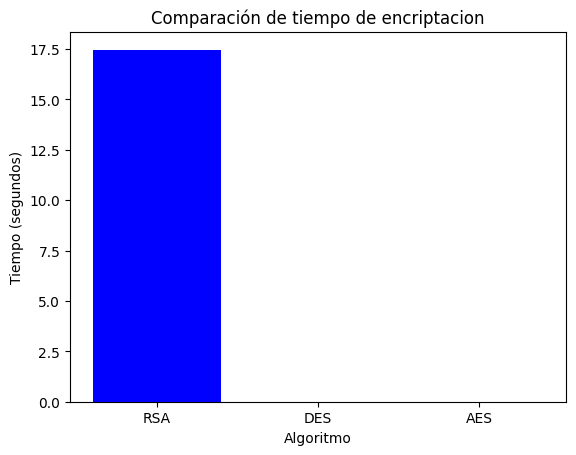

In [5]:
import timeit
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP, DES, AES
from Crypto.Random import get_random_bytes
import matplotlib.pyplot as plt

def rsa_encrypt(data):
    key = RSA.generate(2048)
    cipher_rsa = PKCS1_OAEP.new(key)
    return cipher_rsa.encrypt(data)

def des_encrypt(data):
    key = get_random_bytes(8)  # La clave DES debe tener 8 bytes
    cipher_des = DES.new(key, DES.MODE_EAX)
    return cipher_des.encrypt(data)

def aes_encrypt(data):
    key = get_random_bytes(16)  # La clave AES debe tener 16 bytes
    cipher_aes = AES.new(key, AES.MODE_EAX)
    return cipher_aes.encrypt(data)

data = b'This is a test'

rsa_time = timeit.timeit(lambda: rsa_encrypt(data), number=10)
des_time = timeit.timeit(lambda: des_encrypt(data), number=10)
aes_time = timeit.timeit(lambda: aes_encrypt(data), number=10)

print(f"RSA Tiempo: {rsa_time}")
print(f"DES Tiempo: {des_time}")
print(f"AES Tiempo: {aes_time}")

algorithms = ['RSA', 'DES', 'AES']
times = [rsa_time, des_time, aes_time]

plt.bar(algorithms, times, color=['blue', 'orange', 'green'])
plt.xlabel('Algoritmo')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparación de tiempo de encriptacion')
plt.show()
